# 👉👉 Use environment nlp_v2

In [2]:
# !pip install --upgrade git+https://github.com/huggingface/diffusers.git transformers accelerate scipy

# for faster generation. Requires py 3.10 or 1.11 
# conda install xformers -c xformers/label/dev

In [2]:
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
import torch
import numpy as np
import os

model_id = "stabilityai/stable-diffusion-2"
# model_id = "stabilityai/stable-diffusion-2-depth" # for depth map outputs
# model_id = "stabilityai/stable-diffusion-2-base"

# Use the Euler scheduler here instead
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, revision="fp16", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

/home/kastan/utils/miniconda3/envs/stable_diff/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Fetching 12 files: 100%|██████████| 12/12 [00:00<00:00, 28959.52it/s]
ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


100%|██████████| 50/50 [04:15<00:00,  5.11s/it]


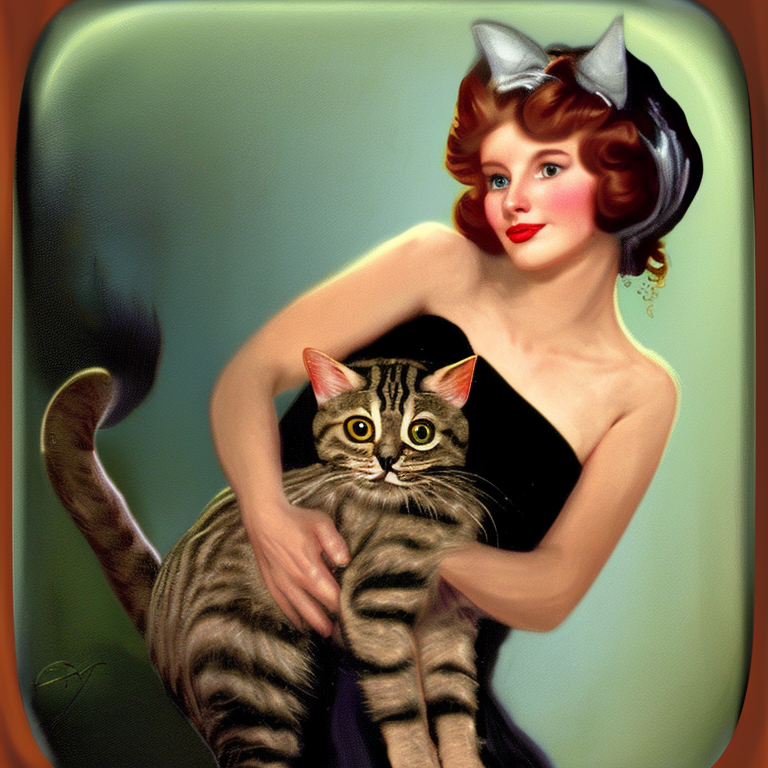

100%|██████████| 50/50 [04:14<00:00,  5.09s/it]


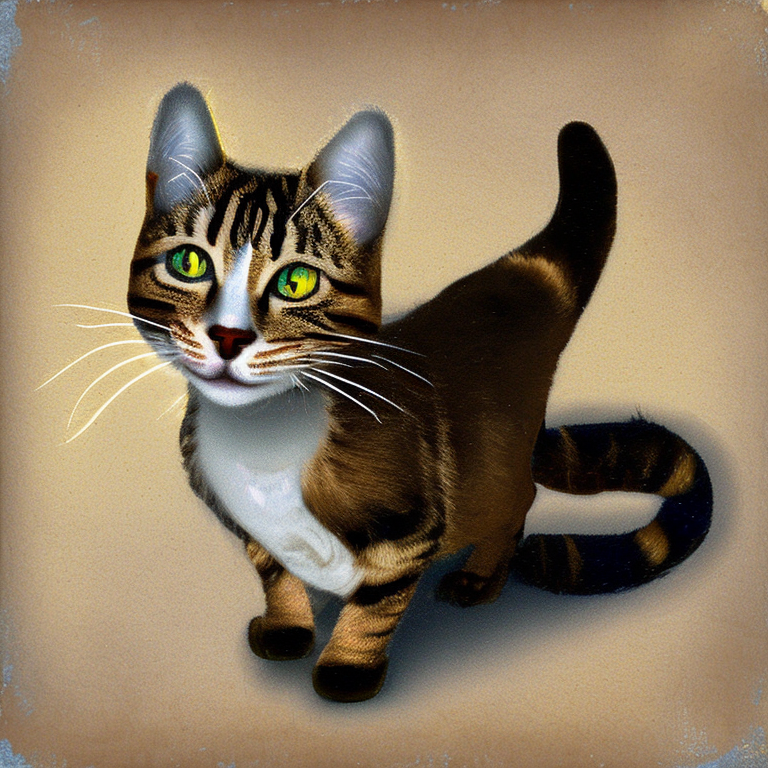

100%|██████████| 50/50 [04:14<00:00,  5.10s/it]


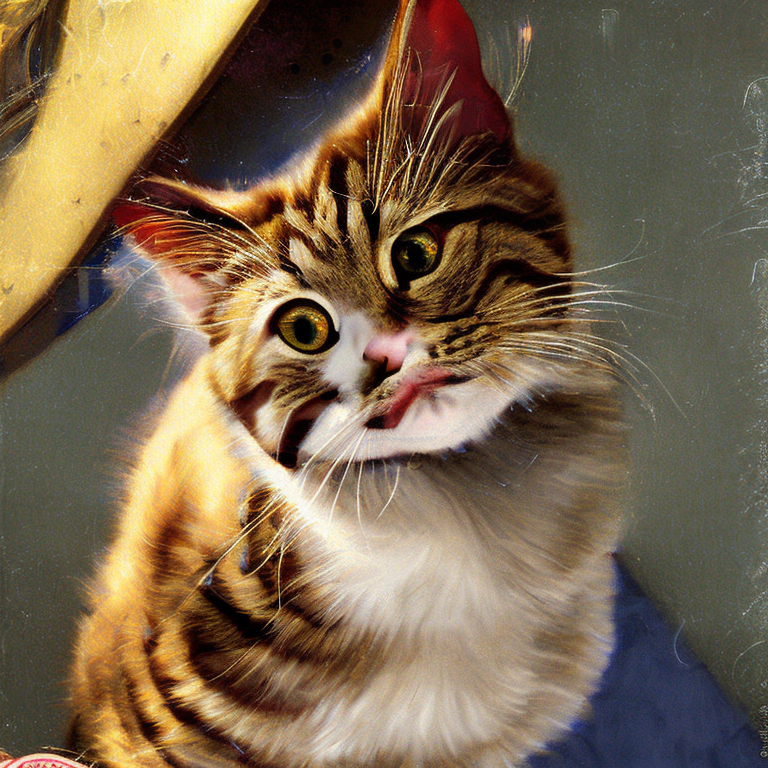

100%|██████████| 50/50 [04:15<00:00,  5.10s/it]


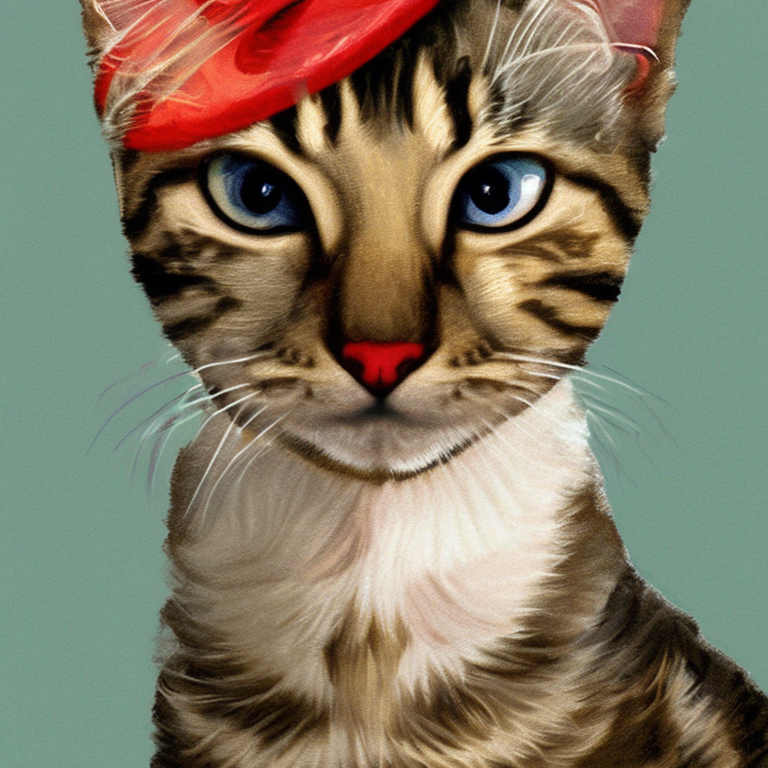

100%|██████████| 50/50 [04:15<00:00,  5.10s/it]


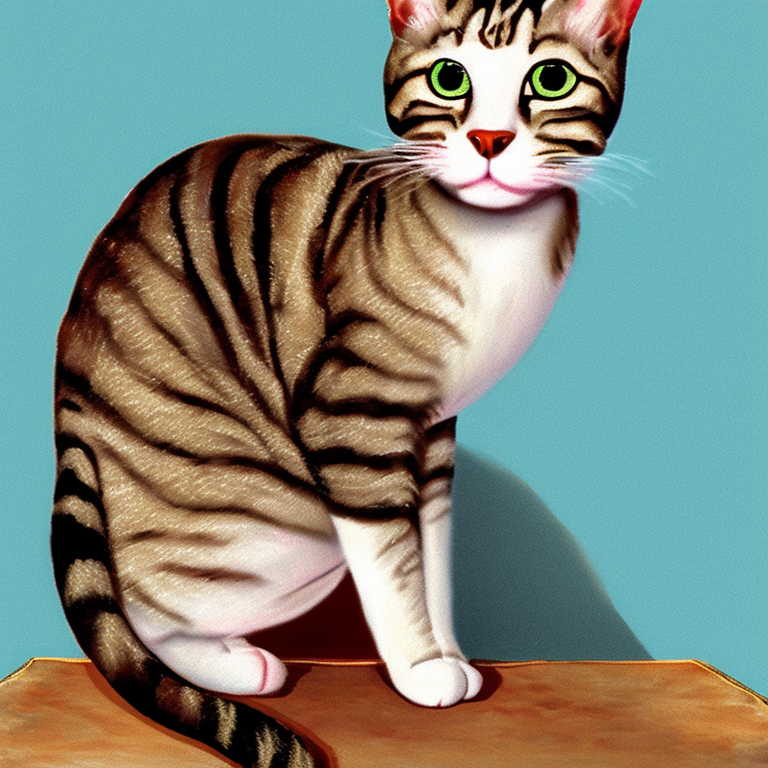

: 

In [3]:
# prompt = "salvador dali mushroom trip, stairway to hell. Repent for your sins. scary, surrealist, shapeshifting aliens"
prompt = "A tabby cat iOS app icon, digital art, Gil Elvgren"

for i in range(5):
  image = pipe(prompt).images[0]    
  display(image)
  rand_int = np.random.randint(0, 1000000)
  prompt_filename = "".join(prompt.split(" "))
  while os.path.exists(prompt_filename):
    rand_int = np.random.randint(0, 1000000)
    prompt_filename = "".join(prompt.split(" "))
  image.save(f"{prompt_filename}_{rand_int}.png")

In [ ]:
prompt = "me and your mother"

for i in range(5):
  image = pipe(prompt).images[0]    
  display(image)
  rand_int = np.random.randint(0, 1000000)
  prompt_filename = "".join(prompt.split(" "))
  while os.path.exists(prompt_filename):
    rand_int = np.random.randint(0, 1000000)
    prompt_filename = "".join(prompt.split(" "))
  image.save(f"{prompt_filename}_{rand_int}.png")

# Using SD via Lightning Apps
https://lightning.ai/kastanvday/apps/01gjzxaf6dehd7nrqkcg6gm5r2

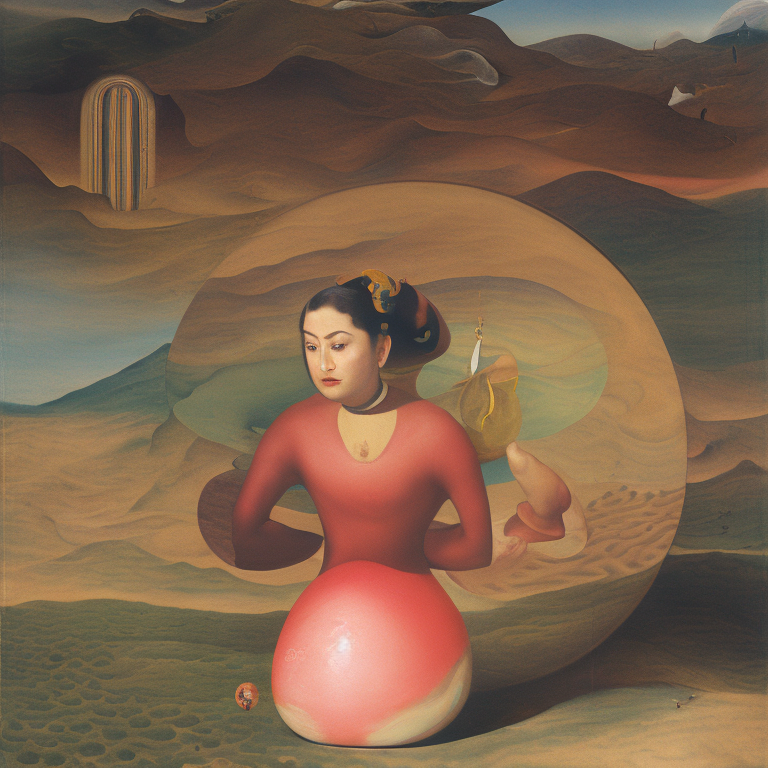

In [1]:
import requests, PIL.Image as Image, io, base64
response = requests.post("https://jcmxt-01gjzxafzq2w9k3gpc1dggxggn.litng-ai-03.litng.ai/predict", json={
  "text": "Woman painting a large red egg in a dali landscape"
})

image = Image.open(io.BytesIO(base64.b64decode(response.json()["image"][22:])))
display(image)
# image.save("response.png")

In [2]:
image.save("response.png")